Nama: Maulida Aprilia Putri Handayani

NPM: 24083010057

Kelas: Matematika Diskrit A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data_Mahasiswa.csv")

print(df.head())

                      Nama  Adil dan Amanah  Suka Membantu  \
0     MADINA HEDY ALIFANTI              1.0            1.0   
1      MARIA DWI KURNIASIH              1.0            0.8   
2  ADINDA PUTRI RACHMAWATI              0.8            0.7   
3           AQUINA SYABITA              0.6            0.9   
4      VARID PUTRA PRATAMA              0.7            1.0   

   Nyambung Kalau Ngobrol  Asyik dan Menarik  
0                     0.9                1.0  
1                     0.7                0.8  
2                     0.5                1.0  
3                     0.8                1.0  
4                     0.9                0.6  


Digunakan untuk membaca 5 data teratas dari dataset yang telah dibuat sebelumnya

In [3]:
kriteria = ["Adil dan Amanah", "Suka Membantu", "Nyambung Kalau Ngobrol", "Asyik dan Menarik"]
C_df = df.set_index("Nama")[kriteria]

P = np.array([0.4, 0.3, 0.2, 0.1])

skor = C_df.values @ P
skor_df = pd.DataFrame(skor, index=C_df.index, columns=["Total Skor"])

Top4 = skor_df.sort_values("Total Skor", ascending=False).head(4)

print(Top4)

                      Total Skor
Nama                            
MADINA HEDY ALIFANTI        0.98
VIA AMANDA                  0.96
ALFANI NUR AZIZAH           0.94
Izzati Kamila Putri         0.93


Merupakan hasil 4 orang dengan skor tertinggi dari kriteria yang telah diberikan

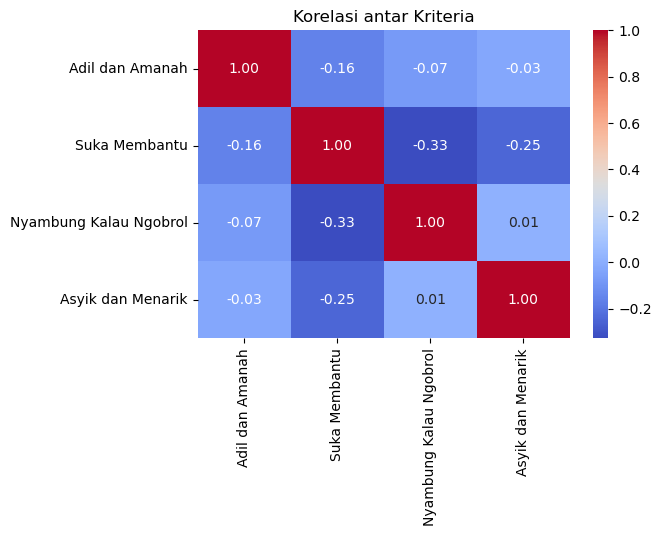

                        Adil dan Amanah  Suka Membantu  \
Adil dan Amanah                1.000000      -0.160704   
Suka Membantu                 -0.160704       1.000000   
Nyambung Kalau Ngobrol        -0.074283      -0.327788   
Asyik dan Menarik             -0.030665      -0.246204   

                        Nyambung Kalau Ngobrol  Asyik dan Menarik  
Adil dan Amanah                      -0.074283          -0.030665  
Suka Membantu                        -0.327788          -0.246204  
Nyambung Kalau Ngobrol                1.000000           0.012680  
Asyik dan Menarik                     0.012680           1.000000   



In [4]:
corr_df = C_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Kriteria")
plt.show()

print(corr_df, "\n")

Pada korelasi antar mahasiswa tersebut dapat diketahui korelasi antara adil dan amanah dengan suka membantu memiliki nilai -0.16 yang artinya korelasi negatif lemah, mahasiswa yang memiliki nilai adil dan amanah tinggi cenderung rendah di suka membantu tetapi hubungannya sangat kecil. Sedangkan adil dan amanah dengan nyambung kalau ngobrol memiliki nilai korelasi -0.07 yang artinya hampir tidak ada korelasi sehingga adil dan amanah tidak berhubungan dengan nyambung kalau ngobrol. Selanjutnya adil dan amanah dengan asyik dan menarik juga memiliki nilai korelasi yang sangat lemah yaitu -0.03 yang artinya tidak berhubungan. Pada variabel selanjutnya yaitu suka membantu dengan nyambung kalau diajak ngobrol memiliki nilai korelasi -0.33 yang memiliki korelasi negatif sedang yang artinya mahasiswa yang suka membantu cenderung kurang nyambung diajak ngobrol. Lalu pada variabel suka membantu dengan asyik dan menarik memiliki nilai korelasi -0.24 yang berkorelasi negatif lemah dimana mahasiswa yang suka membantu dianggap kurang asyik. Dan yang terakhir korelasi antara nyambung diajak ngobrol dengan asyik dan menarik memiliki nilai 0.01 yang artinya hampir tidak ada hubungan karena mendekati nol, sehingga kemampuan mengobrol tidak membuat seseorang dianggap asyik dan menarik.

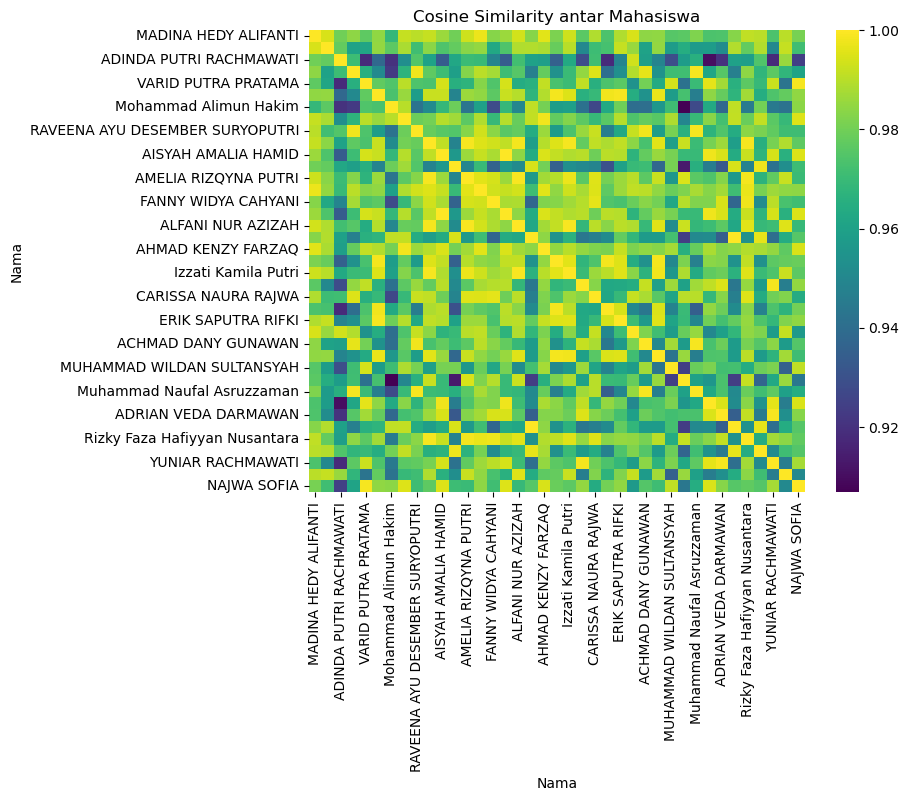

Nama                     MADINA HEDY ALIFANTI  MARIA DWI KURNIASIH  \
Nama                                                                 
MADINA HEDY ALIFANTI                 1.000000             0.994260   
MARIA DWI KURNIASIH                  0.994260             1.000000   
ADINDA PUTRI RACHMAWATI              0.979650             0.977564   
AQUINA SYABITA                       0.984102             0.960598   
VARID PUTRA PRATAMA                  0.976916             0.961523   

Nama                     ADINDA PUTRI RACHMAWATI  AQUINA SYABITA  \
Nama                                                               
MADINA HEDY ALIFANTI                    0.979650        0.984102   
MARIA DWI KURNIASIH                     0.977564        0.960598   
ADINDA PUTRI RACHMAWATI                 1.000000        0.970582   
AQUINA SYABITA                          0.970582        1.000000   
VARID PUTRA PRATAMA                     0.918085        0.965628   

Nama                     VARID P

In [5]:
norms = np.linalg.norm(C_df.values, axis=1, keepdims=True)
cosine_sim = (C_df.values @ C_df.values.T) / (norms @ norms.T)
cosine_df = pd.DataFrame(cosine_sim, index=C_df.index, columns=C_df.index)

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_df, cmap="viridis")
plt.title("Cosine Similarity antar Mahasiswa")
plt.show()

print(cosine_df.iloc[:5, :5])

Berdasarkan output tersebut dapat diketahui persamaan rata-rata mahasiswa relatif tinggi atau tidak berbeda jauh. Warna kuning menunjukkan mahasiswa sangat mirip dalam semua kriteria, warna hijau menunjukkan mirip tetapi ada perbedaan dan warna biru merupakan pasangan yang paling berbeda. Pada output tersebut terlihat ada mahasiswa dengan warna kuning lebih pekat di area tertentu yang dapat diartikan mahasiswa memiliki penilaian yang sangat mirip.

# PCA (Principal Component Analysis)

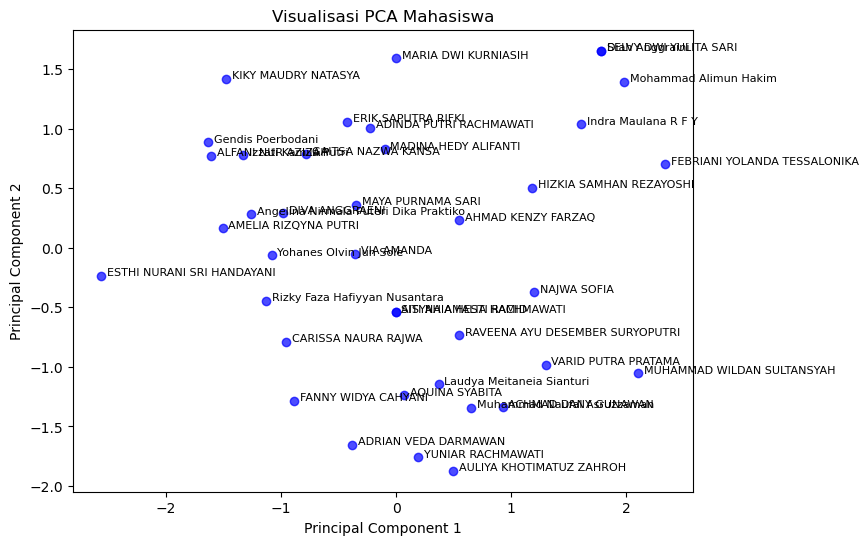

Explained Variance Ratio: [0.35614697 0.26444604]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[["Adil dan Amanah", "Suka Membantu", "Nyambung Kalau Ngobrol", "Asyik dan Menarik"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Nama"] = df["Nama"]

plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c="blue", alpha=0.7)
for i, name in enumerate(df_pca["Nama"]):
    plt.text(df_pca["PC1"][i]+0.05, df_pca["PC2"][i], name, fontsize=8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi PCA Mahasiswa")
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Principal Component 1 menjelaskan mengenai variasi data dengan nilai 0.356 (35.6%) sedangkan principal component 2 memiliki nilai variasi data sebesar 0.264 (26.4%) sehingga total dua dimensi ini bernilai 0.62 (62%) informasi dari keseluruhan data yang dapat mewakili sebagian besar pola mahasiswa. Setiap titik pada output tersebut merupakan 1 mahasiswa, dimana posisi titik ditentukan oleh nilai kriteria yang ada. Titik nama mahasiswa yang berdekatan dalam grafik berarti mahasiswa tersebut memiliki pola penilaian yang sangat mirip, sebaliknya mahasiswa yang jauh posisinya berarti punya karakteristik penilaian yang berbeda. Beberapa mahasiswa yang ada di pojok kanan atas artinya mahasiswa tersebut memiliki skor tinggi di beberapa aspek tertentu yang membuat mereka unik. Sedangkan kelompok mahasiswa yang terpusat di tengah artinya mereka punya penilaian rata-rata yang mirip. 

In [7]:
df["Rata_rata"] = df[["Adil dan Amanah", "Suka Membantu", 
                      "Nyambung Kalau Ngobrol", "Asyik dan Menarik"]].mean(axis=1)

df["Label_Ketua"] = (df["Rata_rata"] >= 0.825).astype(int)

print(df[["Nama", "Rata_rata", "Label_Ketua"]].head())


                      Nama  Rata_rata  Label_Ketua
0     MADINA HEDY ALIFANTI      0.975            1
1      MARIA DWI KURNIASIH      0.825            1
2  ADINDA PUTRI RACHMAWATI      0.750            0
3           AQUINA SYABITA      0.825            1
4      VARID PUTRA PRATAMA      0.800            0


# Klasifikasi

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



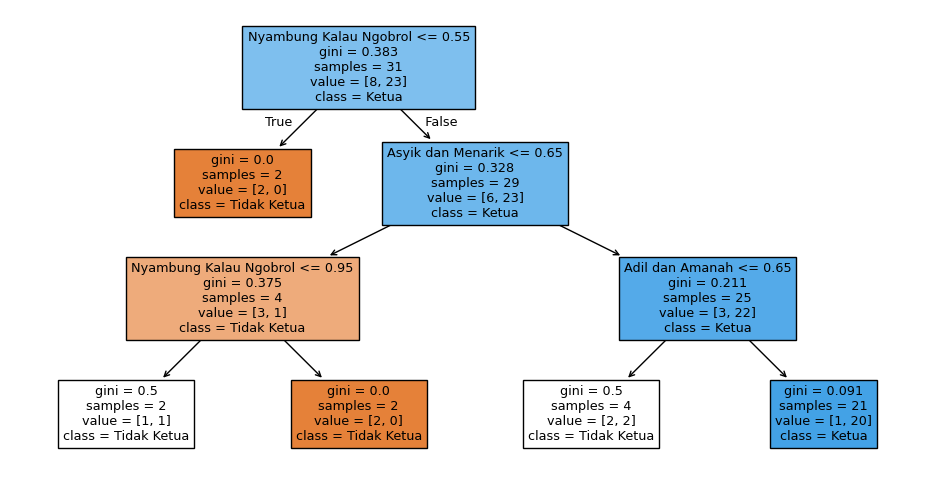

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

X = df[["Adil dan Amanah", "Suka Membantu", "Nyambung Kalau Ngobrol", "Asyik dan Menarik"]]

y = df["Label_Ketua"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=["Tidak Ketua", "Ketua"], filled=True)
plt.show()


Pada hasil output model tersebut didapatkan nilai accuracy 0.75 yang artinya model dapat menebak 75% mahasiswa dengan benar. Precision untuk Ketua memiliki nilai 1.00 yang artinya semua yang diprediksi ketua memang benar ketua namun recall ketua menghasilkan nilai 0.60 yang artinya dari semua ketua hanya 60% yang berhasil ditangkap oleh model. F1-score dengan nilai 0.75 menunjukkan keseimbangan antara precision dan recall cukup bagus.

Pada bagian atas decision tree dilakukan pada kriteria "Nyambung Kalau Ngobrol <= 0.55" yang artinya kemampuan mahasiswa dalam obrolan menjadi faktor awal yang dipakai untuk membedakan calon ketua dan bukan. Pada cabang kiri rata-rata diklasifikasikan sebagai tidak ketua sedangkan pada cabang kanan memakai kriteria "Asyik dan Menarik <= 0.65" dimana jika nilai asyik dan menarik rendah lebih banyak ke tidak ketua dan kalau tinggi dilanjutkan pada kriteria Adil dan Amanah. Terakhir pada decision node biru kelas mayoritas adalah ketua, sedangkan pada desicion node orange kelas mayoritas tidak ketua.